Student name: Pierre-Louis JALLERAT

Student id: 21182659

# Deep neural networks

#### Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the digits dataset, which is already available in sklearn.

From sklearn documentation: This dataset is made up of 1797 8x8 images. Each image is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.


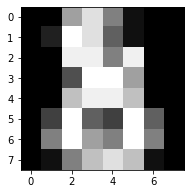

In [16]:
# given

from sklearn.datasets import load_digits
digits = load_digits(return_X_y=False)

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray, interpolation='nearest')
plt.show()

X = digits.data        # The flattened, vector version of the images
y = digits.target

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split our dataset into an input and output train dataset, and into an input and output test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply a Standard Scaler to the input test and train dataset
X_scaler = StandardScaler()
X_train_sc = X_scaler.fit_transform(X_train)
X_test_sc = X_scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the digit that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

In [18]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Build the Perceptron model and train it
percep = Perceptron()
percep.fit(X_train_sc, y_train)
prediction = percep.predict(X_test_sc)

In [19]:
# Compute the accuracy between the true value and the prediction
accuracy = accuracy_score(y_test, prediction, normalize = True)
print("Accuracy:", accuracy)

Accuracy: 0.95


The model is 95% accurate so it seems to be pretty good 

In [20]:
# Loop to find the incorrect prediction and get its index
indexOfAnError = 0
for i in range(len(y_test)):
  if y_test[i] != prediction[i]:
    indexOfAnError = i
    break;

print("Prediction n°", indexOfAnError, ":", prediction[indexOfAnError])
print("Expected value n°", indexOfAnError, ":", y_test[indexOfAnError])

Prediction n° 5 : 8
Expected value n° 5 : 1


In my opinion it can make sense that the model misclassify 1 and 8 because they sahre some similarity. Both of these numbers are symetrics (they are the only ones with 0) and do not have horizontale line.

A multi-class Perceptron is algorithm with multiple "Binary Percepton" working in parallel. All the Binary Perceptrons receive all the features as input. Each of the Binary Perceptron evaluates one class and compute if the input data correspond to the class or not. ie. one Perceptron computes if the input data correspond to a 1 or not, then another one computes if it correspond to a 2 or not, ...
Then we look at the Perceptron which return a 1 ie: it predic that the input data correspond to its class. If multiple Perceptrons predict a 1, we select the one which have the highest value for the result of the Net Input function. The class corresponding to this Perceptron correspond to our prediction.

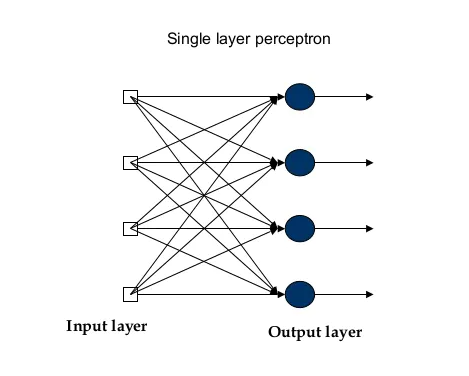


The accuracy is not too bad (you should achieve about 95% if you've done it right). Not bad at all for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can get closer to 99%.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point (something like 97% hopefully?). That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

In [21]:
from sklearn.neural_network import MLPClassifier

# Build a Multi-Layer Perceptron and train it
MLP = MLPClassifier(alpha = 0.1, verbose = 1, random_state = 1, hidden_layer_sizes = (20))
MLP.fit(X_train_sc, y_train)

Iteration 1, loss = 2.61756973
Iteration 2, loss = 2.39404684
Iteration 3, loss = 2.20163821
Iteration 4, loss = 2.03264632
Iteration 5, loss = 1.88116882
Iteration 6, loss = 1.74447896
Iteration 7, loss = 1.62096986
Iteration 8, loss = 1.50799037
Iteration 9, loss = 1.40382840
Iteration 10, loss = 1.30806166
Iteration 11, loss = 1.21860592
Iteration 12, loss = 1.13430224
Iteration 13, loss = 1.05475439
Iteration 14, loss = 0.98075443
Iteration 15, loss = 0.91310948
Iteration 16, loss = 0.84961337
Iteration 17, loss = 0.79081219
Iteration 18, loss = 0.73596601
Iteration 19, loss = 0.68681153
Iteration 20, loss = 0.64119680
Iteration 21, loss = 0.59966504
Iteration 22, loss = 0.56328525
Iteration 23, loss = 0.53065837
Iteration 24, loss = 0.50080195
Iteration 25, loss = 0.47409928
Iteration 26, loss = 0.45054961
Iteration 27, loss = 0.42875310
Iteration 28, loss = 0.40925956
Iteration 29, loss = 0.39109276
Iteration 30, loss = 0.37428720
Iteration 31, loss = 0.35852081
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.1, hidden_layer_sizes=20, random_state=1, verbose=1)

In [22]:
# Generate prediction wirg the test data
predictionMLP_test_data = MLP.predict(X_test_sc)

# Generate prediction wirg the train data
predictionMLP_train_data = MLP.predict(X_train_sc)

# Compute and compare the accuracies of the predictions found between the input train and test data.
test_accuracyMLP = accuracy_score(y_test, predictionMLP_test_data)
train_accuracyMLP = accuracy_score(y_train, predictionMLP_train_data)
print("Test accuracy :", test_accuracyMLP)
print("Train accuracy :", train_accuracyMLP)

Test accuracy : 0.9722222222222222
Train accuracy : 0.9993041057759221


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

1.The input layer correspond of the features of the data. In our case they 64 pixel per image so 64 features. The size of the input layer is 64

2.The size of the output layer label is 10 because there 10 class. As a I explained for the Multiclass Perceptron, we need at the end, for each class, 1 Perceptron which predictz if the input data correspond to its class or not.

3.For the input layer there 64 features, so 64 weight. Theses 64 inputs unit are connected to the 20 units of the hidden layer. Then the 20 unit of the hidden layer are connected to the 10 units of the output layer. So we have 20 * 64 + 10 * 20 = 1480 weight

4.Having a training accuary a bit better a testing accuary means that the model is slightly overfitting. The training accuracy is 2% better than the test accuracy so it's mean that the model is a bit less efficient to recognize data it has never seen before. Also the training accuracy is almost 100% which is very hight, it is also why it is more likely to be overfitting

#### Visualise

In the above test, we're going to leave the default number of epochs/iterations at 200. We should see that, with a single layer with only 20 neurons, that we hit this limit before we get convergence, and a warning should be thrown that the maximum number of iterations has been reached. We could increase the number of iterations, in the hopes that we converge at a low loss. But let's instead play with the design of our network.

But first, let's show some of the test samples, and the predicted labels.

**Hint:** Each sample in `X_test` will be a 64-vector. To render as an 8x8 image, we have to convert to an 8x8 matrix. You can use `*.reshape(8, 8)` for this (assuming numpy vectors).

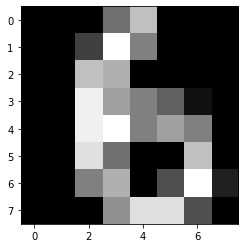

Label:  6



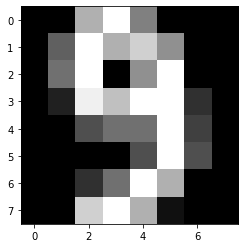

Label:  9



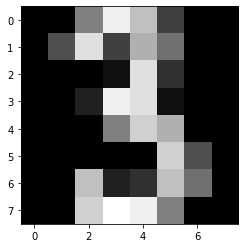

Label:  3



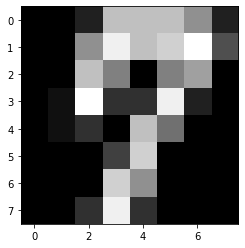

Label:  7



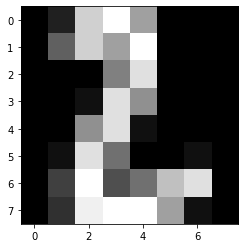

Label:  2



In [23]:
import numpy as np

# Cast my input test dataset into a 8x8 matrix array. Each 8x8 matrix correspond to a picture with 8x8 pixel.
X_test_8x8 = []
for i in X_test:
  X_test_8x8.append(np.reshape(i, (8,8)))

# Print the 5 first pictures of my test input dataset with their labels
for i in range(5):
  plt.imshow(X_test_8x8[i], cmap=plt.cm.gray, interpolation='nearest')
  plt.show()
  print("Label: ", y_test[i])
  print("")


#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Well, this makes some sense. However, we have seen that we get pretty good test accuracy already! So what does this mean? The hidden layer is encoding a set of 20 features that we then use to describe the digits in the output layer. This means that 95% of the handwritten digits can be correctly classified using these 20 features.

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 500, 1000, 2000, 4000)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [24]:
# Your classifier training code here
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Array of different layer wide parameter
layer_wide = [20, 50, 100, 500, 1000, 2000, 4000]

# Arrays to store the accuracy of each model
train_accuracyMLP_wider = []
test_accuracyMLP_wider = []

# For each layer wide parameter, we train a Multi-Layer Perceptron model.
# Then we compute the accuracy of the predictions found with the input train and test data. 
# The accuracies are store in the train_accuracyMLP_wider and test_accuracyMLP_wider arrays
for i in layer_wide:
  MLP_wider = MLPClassifier(alpha = 0.001, verbose = 1, random_state = 1, hidden_layer_sizes = (i))
  MLP_wider.fit(X_train_sc, y_train)
  predictionMLP_wider_test_data = MLP_wider.predict(X_test_sc)
  predictionMLP_wider_train_data = MLP_wider.predict(X_train_sc)
  test_accuracyMLP_wider.append(accuracy_score(y_test, predictionMLP_wider_test_data))
  train_accuracyMLP_wider.append(accuracy_score(y_train, predictionMLP_wider_train_data))

Iteration 1, loss = 2.60527366
Iteration 2, loss = 2.38191823
Iteration 3, loss = 2.18959690
Iteration 4, loss = 2.02062206
Iteration 5, loss = 1.86911108
Iteration 6, loss = 1.73230288
Iteration 7, loss = 1.60859060
Iteration 8, loss = 1.49537203
Iteration 9, loss = 1.39093687
Iteration 10, loss = 1.29488455
Iteration 11, loss = 1.20511327
Iteration 12, loss = 1.12048497
Iteration 13, loss = 1.04059499
Iteration 14, loss = 0.96627694
Iteration 15, loss = 0.89837196
Iteration 16, loss = 0.83459781
Iteration 17, loss = 0.77548075
Iteration 18, loss = 0.72032629
Iteration 19, loss = 0.67092239
Iteration 20, loss = 0.62507386
Iteration 21, loss = 0.58331860
Iteration 22, loss = 0.54670820
Iteration 23, loss = 0.51384017
Iteration 24, loss = 0.48378552
Iteration 25, loss = 0.45689645
Iteration 26, loss = 0.43315815
Iteration 27, loss = 0.41117505
Iteration 28, loss = 0.39150588
Iteration 29, loss = 0.37314328
Iteration 30, loss = 0.35613319
Iteration 31, loss = 0.34016096
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 11, loss = 0.59002409
Iteration 12, loss = 0.52860519
Iteration 13, loss = 0.47595987
Iteration 14, loss = 0.43154384
Iteration 15, loss = 0.39467939
Iteration 16, loss = 0.36312170
Iteration 17, loss = 0.33529349
Iteration 18, loss = 0.31114290
Iteration 19, loss = 0.29059830
Iteration 20, loss = 0.27223795
Iteration 21, loss = 0.25569655
Iteration 22, loss = 0.24116761
Iteration 23, loss = 0.22773610
Iteration 24, loss = 0.21556959
Iteration 25, loss = 0.20462299
Iteration 26, loss = 0.19446332
Iteration 27, loss = 0.18518411
Iteration 28, loss = 0.17686393
Iteration 29, loss = 0.16869913
Iteration 30, loss = 0.16163869
Iteration 31, loss = 0.15470416
Iteration 32, loss = 0.14816750
Iteration 33, loss = 0.14211529
Iteration 34, loss = 0.13644197
Iteration 35, loss = 0.13114943
Iteration 36, loss = 0.12621711
Iteration 37, loss = 0.12161442
Iteration 38, loss = 0.11715664
Iteration 39, loss = 0.11281089
Iteration 40, loss = 0.10886322
Iteration 41, loss = 0.10501666
Iteratio

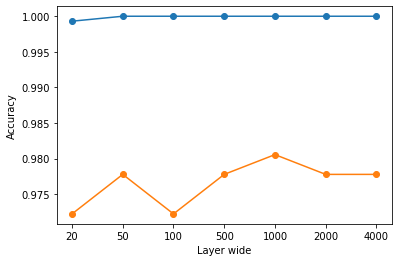

In [25]:
# Plot of training and test accuracy
import matplotlib.pyplot as plt

default_x_ticks = range(len(layer_wide))
plt.plot(default_x_ticks, train_accuracyMLP_wider, marker="o")
plt.plot(default_x_ticks, test_accuracyMLP_wider, marker="o")
plt.xticks(default_x_ticks, layer_wide)
plt.xlabel("Layer wide")
plt.ylabel("Accuracy")
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

1. More the layer is wide, more it takes time to train the model. Also models with wider layers need less iteration to converge to a low loss function.

2. According to the graph the model with the biggest number of neurons is not the most accurate. The most accurate is the model with 1000 neurons wide. Because it is faster to train than the other models with wider layer, it seems to be the best option.
The number of weights learning by the 1000 neurones wide model is : 64 \* 1000 + 1000 \* 10 = 74 000
The training accuracy is 1.2% better than the testing accuracy. The model is still slightly overfitting. To reduce it, we can use more traning data. If the model is train with more differents inputs it should be better to recognise data it has never seen before. We could also use regularization. Finally if we can't have more training data, we could use a Cross Validator so all the data will be used to train our model.


## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a 1000 neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((50,50),(50,50,50),(50,100),(100,100,50),(100,100,100))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

In [26]:
# Your classifier training code here
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Array of different layer wide parameter
layers = [(50,50),(50,50,50),(50,100),(100,100,50),(100,100,100)]

# Arrays to store the accuracy of each model
train_accuracyMLP_deeper = []
test_accuracyMLP_deeper = []

# For each layer wide parameter, we train a Multi-Layer Perceptron model.
# Then we compute the accuracy of the predictions found with the train and test input datasets. 
# The accuracies are store in the train_accuracyMLP_deeper and test_accuracyMLP_deeper arrays
for i in layers:
  MLP_deeper = MLPClassifier(alpha = 0.001, verbose = 1, random_state = 1, hidden_layer_sizes = i)
  MLP_deeper.fit(X_train_sc, y_train)
  predictionMLP_deeper_test_data = MLP_deeper.predict(X_test_sc)
  predictionMLP_deeper_train_data = MLP_deeper.predict(X_train_sc)
  test_accuracyMLP_deeper.append(accuracy_score(y_test, predictionMLP_deeper_test_data))
  train_accuracyMLP_deeper.append(accuracy_score(y_train, predictionMLP_deeper_train_data))

Iteration 1, loss = 2.53834375
Iteration 2, loss = 2.14644584
Iteration 3, loss = 1.84811817
Iteration 4, loss = 1.58248033
Iteration 5, loss = 1.34224714
Iteration 6, loss = 1.12066806
Iteration 7, loss = 0.92500717
Iteration 8, loss = 0.75929451
Iteration 9, loss = 0.62681796
Iteration 10, loss = 0.52198805
Iteration 11, loss = 0.44138091
Iteration 12, loss = 0.37707607
Iteration 13, loss = 0.32630418
Iteration 14, loss = 0.28555163
Iteration 15, loss = 0.25036840
Iteration 16, loss = 0.22292150
Iteration 17, loss = 0.19945707
Iteration 18, loss = 0.17816849
Iteration 19, loss = 0.16100727
Iteration 20, loss = 0.14666968
Iteration 21, loss = 0.13419916
Iteration 22, loss = 0.12371830
Iteration 23, loss = 0.11406997
Iteration 24, loss = 0.10540579
Iteration 25, loss = 0.09782173
Iteration 26, loss = 0.09140886
Iteration 27, loss = 0.08543201
Iteration 28, loss = 0.07920343
Iteration 29, loss = 0.07419919
Iteration 30, loss = 0.06978299
Iteration 31, loss = 0.06578990
Iteration 32, los

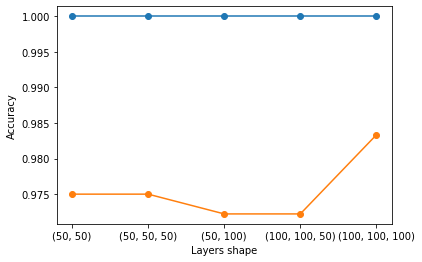

In [27]:
# Plot of training and test accuracy
import matplotlib.pyplot as plt

default_x_ticks_deeper = range(len(layers))
plt.plot(default_x_ticks_deeper, train_accuracyMLP_deeper, marker="o")
plt.plot(default_x_ticks_deeper, test_accuracyMLP_deeper, marker="o")
plt.xticks(default_x_ticks_deeper, layers)
plt.xlabel("Layers shape")
plt.ylabel("Accuracy")
plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

The layer size (100, 100, 100) gives an accuracy around 0.985. It is better than the models we train with only one layer. So this model of 300 neurons have better results than the model with 1 hidden layers of 1000 neurons.
The (100, 100, 100) layer size have 27 400 weights: 64 \* 100 + 100 \* 100 + 100 \* 100 + 100 \* 10 = 27 400. Comparing tho the 1000 neurons layer which has 74 000 weights, the number of weight the almost 3 times lower and still produce a better result

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


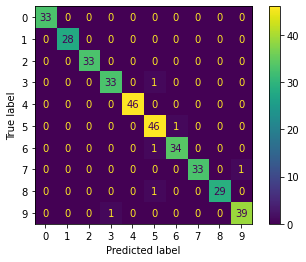

In [28]:
from sklearn.metrics import plot_confusion_matrix

# Plit the confusion matrix
plot_confusion_matrix(MLP_deeper, X_test_sc, y_test)  
plt.show()

We can see that the model is accurate. The large numbers in the diagonal show that the model predict the good labels almost everytime. It only did 6 mistakes. It predicted a 5 instead of a 3, a 6 instead of a 5, a 5 instead of a 6, a 9 instead of 7, a 5 instead of a 8, a 3 instead of 9.

# Some final comments

What we have really done here is a manual hyper-parameter search for an optimal neural network for handwritten digit classification. We have only touched the network architecture, but as we know from before, playing with things like learning rates, regularisation parameters, and other hyper-parameters, can lead to improved performance as well. There are also [automated hyper-parameter search mechanisms](https://scikit-learn.org/stable/modules/grid_search.html). These include thinks like grid search and randomised parameter searching. We won't touch on these during this module, but it is good for you to understand that these exist.

When I started hearing lots about neural networks in the early to mid 2010s, I thought it was some kind of magic. At that stage, I had never really worked in machine learning. I had done a small bit of the traditional ML for computer vision (such as [HOG+SVM](https://medium.com/@mithi/vehicles-tracking-with-hog-and-linear-svm-c9f27eaf521a) in computer vision), but I'm comfortable in saying that I never really understood it. Deep neural networks were these amazing new things that were blowing everything else out of the water, and I think I assumed that they were these were new and ultra-complex algorithms that were difficult to understand. I hope that you realise what I learned after a while: firstly, neural networks aren't new at all, and secondly, if you know and understand linear classification models, such as the percepton, then deep neural networks are easily understood (particularly if you understand the chain rule and backprop as well).

-- Ciarán